In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
from string import punctuation
import pronouncing
from sklearn import metrics
from scipy.spatial.distance import cdist
nlp = spacy.load('en')
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def rhymes(text):
    count = Counter()
    words = text.split()
    for word in words:
        pronunciation_list = pronouncing.phones_for_word(word)
        if len(pronunciation_list) > 0:
            count.update(pronunciation_list[0].split(" "))
    return len({k:v for (k,v) in count.items() if v > 1})

9

In [3]:
punctuation_symbols = []
for each in list(punctuation):
    punctuation_symbols.append((each, ''))

In [4]:
def remove_puncuation(x):
    for each in punctuation_symbols:
        x = x.replace(*each)
        x = x.lower()
    return x

In [5]:
file_names = open('PoemList.txt', 'r')
file_names = file_names.readlines()
file_names = [file[:-1] for file in file_names]
author_poem = [file[:-4] for file in file_names]
poem_titles = [re.sub(r'.*_', '', article) for article in author_poem]
poets = [re.sub(r'_.*', '', article) for article in author_poem]

poems = []
word_count = []
line_count = []
num_of_sents = []
processed_poems = []
max_sent_length = []
min_sent_length = []
no_punct_poems = []
processed_no_punct = []
num_of_rhymes = []
for text in file_names:
    # open the text, take out returns 
    opened = open(text, 'r').read()
    poem = opened.replace("\n"," ")
    poem = poem.replace('-', ' ')
    poems.append(poem)
    
    sentences = re.split(r'[.!?]', poem)
    if '' in sentences: 
        sentences.remove('')
    num_of_sents.append(len(sentences))
    
    no_punct = remove_puncuation(poem)
    no_punct_poems.append(no_punct)
    
    rhyme_count = rhymes(no_punct)
    num_of_rhymes.append(rhyme_count)
    
    wordcount = Counter(no_punct.split())
    wordcount = sum(wordcount.values())
    word_count.append(wordcount)
    
    no_punct = nlp(no_punct)
    processed_no_punct.append(no_punct)
    
    num_lines = sum(1 for line in open(text))
    line_count.append(num_lines)
    
#     sentence_length = [len(sent) for sent in sentences]
#     max_sent_length.append(max(sentence_length))
#     min_sent_length.append(min(sentence_length))
    
    sentences = nlp(poem)
    processed_poems.append(sentences)
    
poems_df = pd.DataFrame()
poems_df['poem'] = poems
poems_df["poem_titles"] = poem_titles
poems_df['authors'] = poets
poems_df['word_count'] = word_count
poems_df['line_count'] = line_count
poems_df['num_of_sents'] = num_of_sents
poems_df['processed_poems'] = processed_poems
# poems_df['max_sent_length'] = max_sent_length
# poems_df['min_sent_length'] = min_sent_length
poems_df['no_punct_cap_poems'] = no_punct_poems
poems_df['processed_no_punct'] = processed_no_punct
poems_df['rhyme_count'] = num_of_rhymes

poems_df.head()

,poem,poem_titles,authors,word_count,line_count,num_of_sents,processed_poems,no_punct_cap_poems,processed_no_punct,rhyme_count
0,"Lying, thinking Last night How to find my soul...",Alone,Angelou,162,42,7,"(Lying, ,, thinking, Last, night, How, to, fin...",lying thinking last night how to find my soul ...,"(lying, thinking, last, night, how, to, find, ...",38
1,Curtains forcing their will against the win...,AwakingInNewYork,Angelou,38,11,3,"(Curtains, forcing, their, will, , against,...",curtains forcing their will against the win...,"(curtains, forcing, their, will, , against,...",27
2,A free bird leaps on the back of the wind ...,CagedBird,Angelou,193,43,6,"(A, free, bird, leaps, , on, the, back, of, t...",a free bird leaps on the back of the wind ...,"(a, free, bird, leaps, , on, the, back, of, t...",35
3,"The eye follows, the land Slips upward, creas...",CaliforniaProdigal,Angelou,130,35,8,"(The, eye, follows, ,, the, land, , Slips, up...",the eye follows the land slips upward creases...,"(the, eye, follows, the, land, , slips, upwar...",39
4,"One foot down, then hop! It's hot. Good things...",HarlemHopscotch,Angelou,90,17,14,"(One, foot, down, ,, then, hop, !, It, 's, hot...",one foot down then hop its hot good things for...,"(one, foot, down, then, hop, its, hot, good, t...",38


In [6]:
poems_df = poems_df.sample(frac=1)
poems_df = poems_df.sample(frac=1)
poems_df = poems_df.sample(frac=1)
poems_df = poems_df.sample(frac=1)
poems_df = poems_df.sample(frac=1)

In [7]:
poems_df.describe()

,word_count,line_count,num_of_sents,rhyme_count
count,140.000000,140.000000,140.000000,140.000000
mean,147.192857,25.657143,7.485714,35.278571
std,135.219401,23.496754,7.850662,6.459690
min,16.000000,2.000000,1.000000,14.000000
25%,67.500000,14.000000,2.000000,32.000000
50%,113.000000,17.000000,5.000000,37.000000
75%,159.000000,29.000000,10.000000,39.000000
max,814.000000,140.000000,43.000000,48.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0ea048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121b525c0>]], dtype=object)

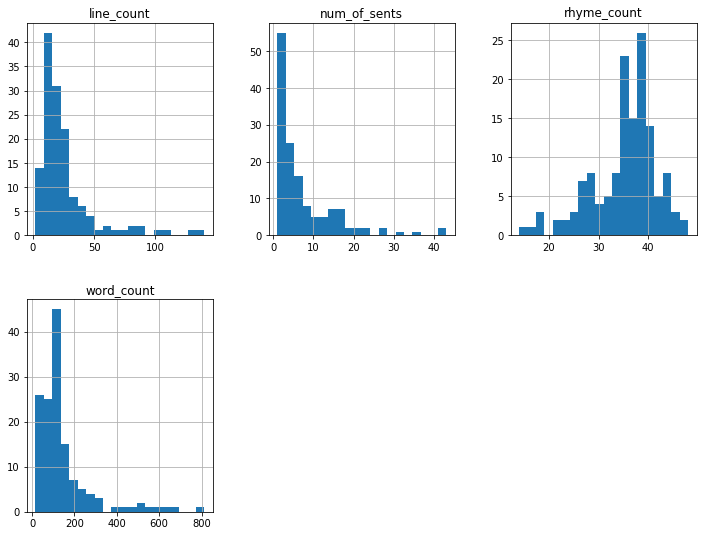

In [8]:
poems_df.hist(bins=20, figsize=(12,9), layout=(2,3))

### Do cluster with original non-pca'd features... also use the percentage of variance retained function to see how much variance was kept using pca...

In [13]:
poems_df.columns

Index(['poem', 'poem_titles', 'authors', 'word_count', 'line_count',
       'num_of_sents', 'processed_poems', 'no_punct_cap_poems',
       'processed_no_punct', 'rhyme_count'],
      dtype='object')

              word_count  line_count  num_of_sents  rhyme_count
word_count      1.000000    0.929102      0.708945     0.669578
line_count      0.929102    1.000000      0.697070     0.616958
num_of_sents    0.708945    0.697070      1.000000     0.532560
rhyme_count     0.669578    0.616958      0.532560     1.000000


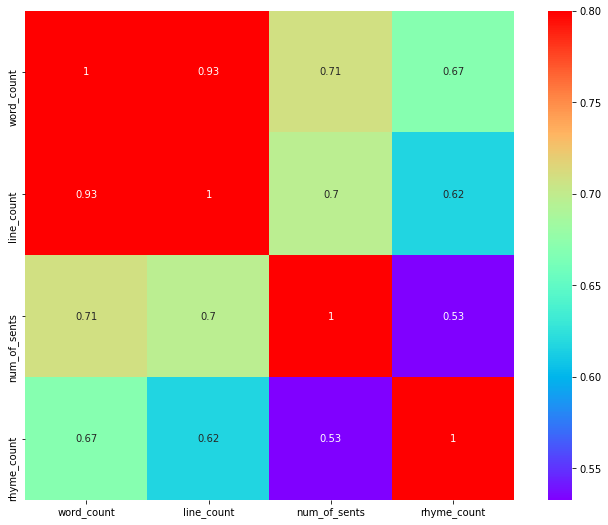

In [14]:
X = poems_df.drop(['poem_titles', 'authors','poem','processed_poems',
       'no_punct_cap_poems', 'processed_no_punct'], axis = 1)

# Make the correlation matrix.
corrmat = X.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap = 'rainbow')
plt.show()

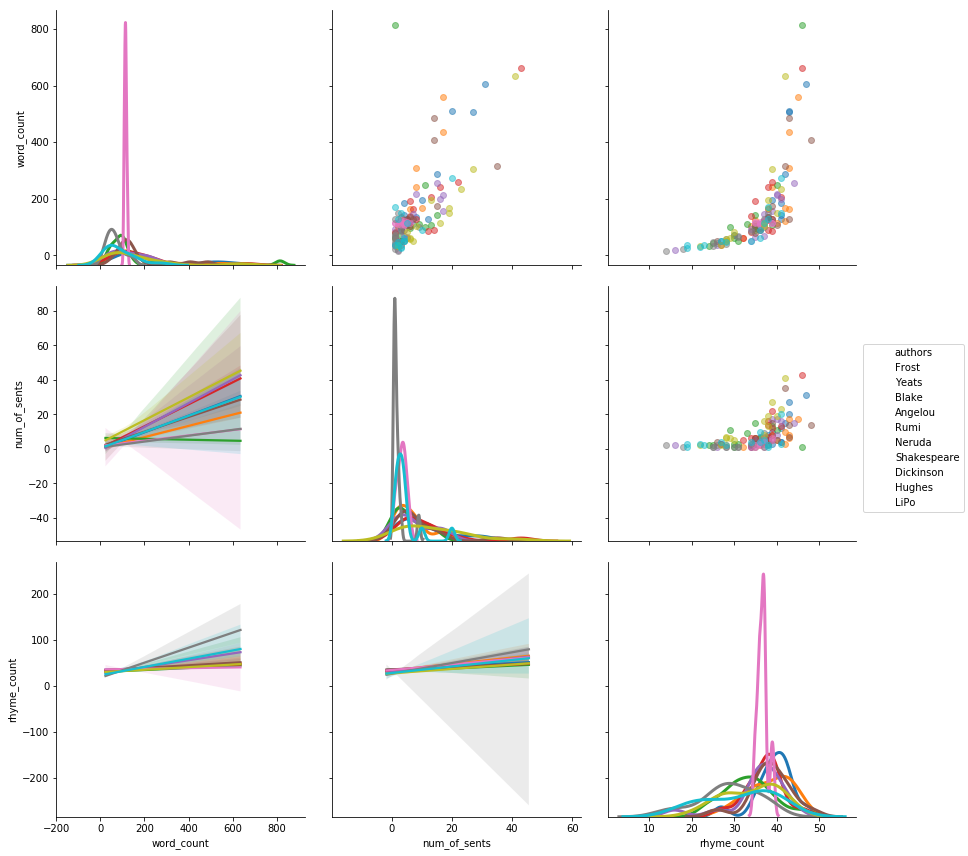

In [106]:
X = poems_df.drop(['poem_titles','poem','processed_poems',
       'no_punct_cap_poems', 'processed_no_punct','line_count'], axis = 1)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(X.dropna(), hue='authors', size= 4, diag_sharey=False)

# Scatterplot.
g = g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g = g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g = g.map_diag(sns.kdeplot, lw=3)

g = g.add_legend()

plt.show()

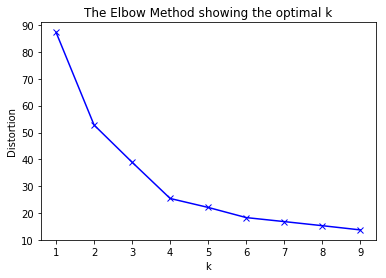

In [16]:
# clustering dataset
# determine k using elbow method

# X = poems_df.drop(['poem_titles', 'authors','poem','processed_poems',
#        'no_punct_cap_poems', 'processed_no_punct'], axis = 1)

# k means determine k
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]

X_norm = normalize(X)

pca = PCA(n_components = None)
# Reduce it to two components.
X_pca = pca.fit_transform(X_norm)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([ 0.95400965,  0.03820613,  0.00778423])

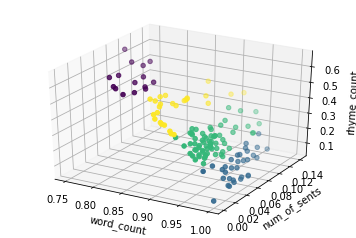

In [19]:
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]

X_norm = normalize(X)

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_norm)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_norm[:, [0]], X_norm[:, [1]], X_norm[:,[2]], c=y_pred)

ax.set_xlabel('word_count')
ax.set_ylabel('num_of_sents')
ax.set_zlabel('rhyme_count')

plt.show()

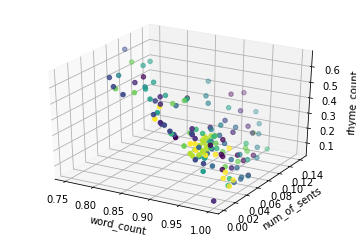

In [133]:
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]

X_norm = normalize(X)

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_norm)

# Change the author names into numbers to be used color values for graph

poems_df['author_codes'] = pd.Categorical(poems_df['authors'])
poems_df['author_codes'] = poems_df.author_codes.cat.codes

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_norm[:, [0]], X_norm[:, [1]], X_norm[:,[2]], c=poems_df.author_codes)

ax.set_xlabel('word_count')
ax.set_ylabel('num_of_sents')
ax.set_zlabel('rhyme_count')

plt.show()

In [21]:
cluster_df = poems_df.copy()
cluster_df['cluster'] = y_pred

In [22]:
for i in range(cluster_df['cluster'].nunique()):
    cluster = cluster_df[cluster_df['cluster']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['authors'])),'\n')

Cluster  0 
 Counter({'Dickinson': 4, 'LiPo': 4, 'Rumi': 3, 'Hughes': 2, 'Angelou': 1, 'Blake': 1}) 

Cluster  1 
 Counter({'Frost': 6, 'Hughes': 5, 'Angelou': 5, 'Yeats': 4, 'Neruda': 4, 'Rumi': 4, 'Blake': 2, 'LiPo': 2}) 

Cluster  2 
 Counter({'Shakespeare': 14, 'Blake': 8, 'Yeats': 8, 'Neruda': 8, 'Frost': 7, 'Angelou': 5, 'Rumi': 5, 'LiPo': 4, 'Hughes': 4, 'Dickinson': 4}) 

Cluster  3 
 Counter({'Dickinson': 6, 'LiPo': 4, 'Hughes': 3, 'Angelou': 3, 'Blake': 3, 'Yeats': 2, 'Neruda': 2, 'Rumi': 2, 'Frost': 1}) 



In [104]:
cluster0 = cluster_df.loc[cluster_df['cluster']== 0, ['no_punct_cap_poems','authors']]
for i in cluster0.index[:5]:
    print(cluster0.loc[i,'no_punct_cap_poems'], '\n')

curtains forcing their will    against the wind  children sleep  exchanging dreams with    seraphim the city  drags itself awake on    subway straps and  i an alarm awake as a    rumor of war  lie stretching into dawn    unasked and unheeded  

hold fast to dreams  for if dreams die life is a broken winged bird that cannot fly  hold fast to dreams for when dreams go life is a barren field frozen with snow 

the moon shimmers in green water  white herons fly through the moonlight  the young man hears a girl gathering water chestnuts into the night singing they paddle home together 

o spirit make thy head in search and seeking like the water of a stream and o reason to gain eternal life tread ever lastingly the way of death keep god in remembrance till self is forgotten that thou may be lost in the called without distraction of caller and call 

“faith” is a fine invention for gentlemen who see but microscopes are prudent in an emergency 



In [24]:
cluster_df.loc[cluster_df['cluster']== 0, ['word_count', 'num_of_sents','rhyme_count']].describe()

,word_count,num_of_sents,rhyme_count
count,15.000000,15.000000,15.000000
mean,33.400000,2.066667,23.933333
std,9.969955,0.883715,5.812138
min,16.000000,1.000000,14.000000
25%,27.000000,1.500000,20.500000
50%,34.000000,2.000000,24.000000
75%,37.000000,2.500000,27.000000
max,51.000000,4.000000,34.000000


In [25]:
cluster_df.loc[cluster_df['cluster']== 1, ['word_count', 'num_of_sents','rhyme_count']].describe()

,word_count,num_of_sents,rhyme_count
count,32.000000,32.000000,32.000000
mean,334.187500,17.093750,41.375000
std,173.433531,10.237059,2.970283
min,167.000000,1.000000,35.000000
25%,203.250000,10.750000,39.000000
50%,257.500000,15.500000,41.000000
75%,447.750000,20.500000,43.000000
max,814.000000,43.000000,48.000000


In [26]:
cluster_df.loc[cluster_df['cluster']== 2, ['word_count', 'num_of_sents','rhyme_count']].describe()

,word_count,num_of_sents,rhyme_count
count,67.000000,67.000000,67.000000
mean,117.641791,5.611940,36.940299
std,20.846991,3.911735,2.757253
min,73.000000,1.000000,29.000000
25%,105.000000,3.000000,35.000000
50%,114.000000,5.000000,37.000000
75%,130.000000,7.000000,38.500000
max,168.000000,19.000000,43.000000


In [27]:
cluster_df.loc[cluster_df['cluster']== 3, ['word_count', 'num_of_sents','rhyme_count']].describe()

,word_count,num_of_sents,rhyme_count
count,26.000000,26.000000,26.000000
mean,58.846154,3.615385,30.038462
std,13.217238,3.335589,4.617192
min,35.000000,1.000000,19.000000
25%,50.250000,1.000000,27.250000
50%,59.000000,2.500000,29.500000
75%,65.250000,4.750000,32.000000
max,90.000000,14.000000,39.000000


In [103]:
cluster2 = cluster_df.loc[cluster_df['cluster']== 2, ['processed_poems','authors']]
for i in cluster2.index[:5]:
    print(cluster2.loc[i,'processed_poems'], '\n')

A sudden blow: the great wings beating still Above the staggering girl, her thighs caressed By the dark webs, her nape caught in his bill, He holds her helpless breast upon his breast.  How can those terrified vague fingers push The feathered glory from her loosening thighs? And how can body, laid in that white rush, But feel the strange heart beating where it lies?  A shudder in the loins engenders there The broken wall, the burning roof and tower And Agamemnon dead.                     Being so caught up, So mastered by the brute blood of the air, Did she put on his knowledge with his power Before the indifferent beak could let her drop? 

It was too lonely for her there, And too wild, And since there were but two of them, And no child.   And work was little in the house, She was free, And followed where he furrowed field, Or felled log.   She rested on a log and tossed The fresh chips, With a song only to herself On her lips.   And once she went to break a bough Of black alder. She 

In [102]:
cluster1 = cluster_df.loc[cluster_df['cluster']== 1, ['processed_poems','authors']]
for i in cluster1.index[:2]:
    print(cluster1.loc[i,'processed_poems'], '\n')

Having a wheel and four legs of its own Has never availed the cumbersome grindstone To get it anywhere that I can see. These hands have helped it go and even race; Not all the motion, though, they ever lent, Not all the miles it may have thought it went, Have got it one step from the starting place. It stands beside the same old apple tree. The shadow of the apple tree is thin Upon it now; its feet are fast in snow. All other farm machinery's gone in, And some of it on no more legs and wheel Than the grindstone can boast to stand or go. (I'm thinking chiefly of the wheelbarrow.) For months it hasn't known the taste of steel, Washed down with rusty water in a tin. But standing outdoors, hungry, in the cold, Except in towns, at night, is not a sin. And, anyway, its standing in the yard Under a ruinous live apple tree Has nothing any more to do with me, Except that I remember how of old, One summer day, all day I drove it hard, And some one mounted on it rode it hard, And he and I between

In [101]:
cluster3 = cluster_df.loc[cluster_df['cluster']== 3, ['processed_poems','authors']]
for i in cluster3.index[:5]:
    print(cluster3.loc[i,'processed_poems'], '\n')

Some say the world will end in fire, Some say in ice. From what I've tasted of desire I hold with those who favor fire. But if it had to perish twice, I think I know enough of hate To know that for destruction ice Is also great, And would suffice. 

 A garden  may its rose be in flower to Resurrection!  An idol  may the two worlds be scattered o'er his beauty!  The Prince of the Fair goes proudly forth to the chase  at morning;  May our hearts fall a prey to the arrow of His glance  From His eye what messages are passing continually to mine!  May my eyes be gladdened and filled with intoxication by  His Message! 

NOR dread nor hope attend A dying animal; A man awaits his end Dreading and hoping all; Many times he died, Many times rose again. A great man in his pride Confronting murderous men Casts derision upon Supersession of breath; He knows death to the bone    Man has created death. 

What happens to a dream deferred?        Does it dry up       like a raisin in the sun?       Or 

### Make sure to do a confusion matrix!!! Experiment with different clusters. Elbow graph!

In [34]:
cluster_df3 = poems_df.copy()
cluster_df3['clusters'] = predict

In [115]:
Y_sup = poems_df['authors']
# X_sup = np.array(bow_df.drop(['processed_no_punct','authors'], 1))


X_sup = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]

X_sup_train, X_sup_test, Y_sup_train, Y_sup_test = train_test_split(X_sup, Y_sup, test_size=0.20, random_state=42)

In [116]:
rfc_sup = ensemble.RandomForestClassifier()

rfc_sup.fit(X_sup_train, Y_sup_train)

print('Training set score:', rfc_sup.score(X_sup_train, Y_sup_train))
print('Training set score:', rfc_sup.score(X_sup_test, Y_sup_test)) 

Training set score: 0.955357142857
Training set score: 0.178571428571


In [119]:
lr_sup = LogisticRegression()
lr_sup.fit(X_sup_train, Y_sup_train)

print('Training set score:', lr_sup.score(X_sup_train, Y_sup_train))
print('Training set score:', lr_sup.score(X_sup_test, Y_sup_test))

Training set score: 0.258928571429
Training set score: 0.214285714286


In [118]:
clf_sup = ensemble.GradientBoostingClassifier()
clf_sup.fit(X_sup_train, Y_sup_train)

print('Training set score:', clf_sup.score(X_sup_train, Y_sup_train))
print('Training set score:', clf_sup.score(X_sup_test, Y_sup_test))

Training set score: 0.991071428571
Training set score: 0.142857142857


In [120]:
svm_sup = SVC(kernel = 'linear')
svm_sup.fit(X_sup_train, Y_sup_train)

print('Training set score:', svm_sup.score(X_sup_train, Y_sup_train))
print('Training set score:', svm_sup.score(X_sup_test, Y_sup_test))

Training set score: 0.410714285714
Training set score: 0.178571428571


### Here is the bag of words analysis starts...

In [35]:
poems_df.columns

Index(['poem', 'poem_titles', 'authors', 'word_count', 'line_count',
       'num_of_sents', 'processed_poems', 'no_punct_cap_poems',
       'processed_no_punct', 'rhyme_count'],
      dtype='object')

### First I will use the bag of words analysis on a poem level. As you can see, the results were not that great with the test sets. With only 140 poems available, I am pretty certain it is because there are not very many samples for the models to work with.

In [36]:
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    return allwords

In [37]:
set_bag = []

for i, poem in enumerate(poems_df['processed_no_punct']):
    allwords = bag_of_words(poem)
    set_bag.extend(allwords)
    
set_bag = set(set_bag)

In [38]:
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['processed_no_punct'] = sentences['processed_no_punct']
    df['authors'] = sentences['authors']
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['processed_no_punct']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [39]:
bow_df = bow_features(poems_df, set_bag)

Processing row 0


In [40]:
bow_df.shape

(140, 3049)

In [41]:
Y = bow_df['authors']
X = np.array(bow_df.drop(['processed_no_punct','authors'], 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [42]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, Y_train)

print('Training set score:', rfc.score(X_train, Y_train))
print('Training set score:', rfc.score(X_test, Y_test))

Training set score: 1.0
Training set score: 0.0857142857143


In [43]:
lr = LogisticRegression()
train = lr.fit(X_train, Y_train)

print('Training set score:', lr.score(X_train, Y_train))
print('Training set score:', lr.score(X_test, Y_test))

Training set score: 1.0
Training set score: 0.0285714285714


In [44]:
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, Y_train)

print('Training set score:', clf.score(X_train, Y_train))
print('Training set score:', clf.score(X_test, Y_test))

Training set score: 1.0
Training set score: 0.0571428571429


In [45]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)

print('Training set score:', svm.score(X_train, Y_train))
print('Training set score:', svm.score(X_test, Y_test))

Training set score: 1.0
Training set score: 0.0571428571429


### Below is a bag of words analysis on a sentence level. Now with almost 778 samples to use, which although performed better still is pretty low...

In [46]:
test = []
for i, poem in enumerate(poems_df['processed_no_punct']):
    poem_sents = [[sent, poems_df.loc[i,'authors']] for sent in poems_df.loc[i,'processed_no_punct'].sents]
    test.extend(poem_sents)

sentences_df = pd.DataFrame(test, columns = ['processed_no_punct','authors'])
sentences_df.head()

,processed_no_punct,authors
0,"(lying, thinking, last, night, how, to, find, ...",Angelou
1,"(i, came, up, with, one, thing, and, i, do, n’...",Angelou
2,"(all, alone, nobody, but, nobody, can, make, i...",Angelou
3,"(but, nobody, no, nobody, can, make, it, out, ...",Angelou
4,"(nobody, but, nobody, can, make, it, out, here...",Angelou


In [47]:
def bow_features2(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['processed_no_punct'] = sentences['processed_no_punct']
    df['authors'] = sentences['authors']
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['processed_no_punct']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [48]:
bow_df2 = bow_features2(sentences_df, set_bag)

Processing row 0
Processing row 500


In [49]:
pd.options.display.max_columns = None
bow_df2.head()

tender sens beautiful croon visible choke length liberty drag beating  \
0      0    0         0     0       0     0      0       0    0       0   
1      0    0         0     0       0     0      0       0    0       0   
2      0    0         0     0       0     0      0       0    0       0   
3      0    0         0     0       0     0      0       0    0       0   
4      0    0         0     0       0     0      0       0    0       0   

  generosity articulate agonizing afric withdraw thereof absolute daylight  \
0          0          0         0     0        0       0        0        0   
1          0          0         0     0        0       0        0        0   
2          0          0         0     0        0       0        0        0   
3          0          0         0     0        0       0        0        0   
4          0          0         0     0        0       0        0        0   

  witch attribute heron cautious imagine plate herewith root confront shoe  \
0     0         0     0        0       0     0        0    0        0    0   
1     0         0     0        0       0     0        0    0        0    0   
2     0         0     0        0       0     0        0    0        0    0   
3     0         0     0        0       0     0        0    0        0    0   
4     0         0     0        0       0     0        0    0        0    0   

  philosophy hurt grant tiger dome casement brother breathe stock universe  \
0          0    0     0     0    0        0       0       0     0        0   
1          0    0     0     0    0        0       0       0     0        0   
2          0    0     0     0    0        0       0       0     0        0   
3          0    0     0     0    0        0       0       0     0        0   
4          0    0     0     0    0        0       0       0     0        0   

  baseball tool jealous bless folly t’ang anew trod disaster gurgle fiery  \
0        0    0       0     0     0     0    0    0        0      0     0   
1        0    0       0     0     0     0    0    0        0      0     0   
2        0    0       0     0     0     0    0    0        0      0     0   
3        0    0       0     0     0     0    0    0        0      0     0   
4        0    0       0     0     0     0    0    0        0      0     0   

  compass shake inner fair state bell verily hood live throw heat invent  \
0       0     0     0    0     0    0      0    0    0     0    0      0   
1       0     0     0    0     0    0      0    0    0     0    0      0   
2       0     0     0    0     0    0      0    0    0     0    0      0   
3       0     0     0    0     0    0      0    0    0     0    0      0   
4       0     0     0    0     0    0      0    0    0     0    0      0   

  glade notice fix greek expect cornice face enact poland old complete  \
0     0      0   0     0      0       0    0     0      0   0        0   
1     0      0   0     0      0       0    0     0      0   0        0   
2     0      0   0     0      0       0    0     0      0   0        0   
3     0      0   0     0      0       0    0     0      0   0        0   
4     0      0   0     0      0       0    0     0      0   0        0   

  archipelago shirt herb prow movd arrive slip abraham agile truly fact joy  \
0           0     0    0    0    0      0    0       0     0     0    0   0   
1           0     0    0    0    0      0    0       0     0     0    0   0   
2           0     0    0    0    0      0    0       0     0     0    0   0   
3           0     0    0    0    0      0    0       0     0     0    0   0   
4           0     0    0    0    0      0    0       0     0     0    0   0   

  trail christ northern scheme jug mystery weary polished nickel toss imitate  \
0     0      0        0      0   0       0     0        0      0    0       0   
1     0      0        0      0   0       0     0        0      0    0       0   
2     0      0        0      0   0       0     0        0    

In [50]:
bow_df2 = bow_df2.sample(frac=1)
bow_df2 = bow_df2.sample(frac=1)
bow_df2 = bow_df2.sample(frac=1)
bow_df2 = bow_df2.sample(frac=1)
bow_df2 = bow_df2.sample(frac=1)

In [51]:
bow_df2.shape

(775, 3049)

In [52]:
Y2 = bow_df2['authors']
X2 = np.array(bow_df2.drop(['processed_no_punct','authors'], 1))

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.20, random_state=42)

In [53]:
rfc2 = ensemble.RandomForestClassifier()

rfc2.fit(X2_train, Y2_train)

print('Training set score:', rfc2.score(X2_train, Y2_train))
print('Test set score:', rfc2.score(X2_test, Y2_test))

Training set score: 0.972580645161
Test set score: 0.412903225806


In [54]:
cross_val_score(rfc2, X2, Y2, cv=5)

array([ 0.3375    ,  0.33757962,  0.36774194,  0.32679739,  0.33333333])

In [55]:
lr2 = LogisticRegression()
lr2.fit(X2_train, Y2_train)

print('Training set score:', lr2.score(X2_train, Y2_train))
print('Training set score:', lr2.score(X2_test, Y2_test))

Training set score: 0.929032258065
Training set score: 0.477419354839


In [56]:
cross_val_score(lr2,  X2, Y2, cv=5)

array([ 0.4625    ,  0.50955414,  0.51612903,  0.49673203,  0.42666667])

In [57]:
svm2 = SVC(kernel = 'linear')
svm2.fit(X2_train, Y2_train)

print('Training set score:', svm2.score(X2_train, Y2_train))
print('Training set score:', svm2.score(X2_test, Y2_test))

Training set score: 0.972580645161
Training set score: 0.393548387097


In [58]:
cross_val_score(svm2, X2, Y2, cv=5)

array([ 0.3375    ,  0.39490446,  0.38709677,  0.39215686,  0.35333333])

### Cluster analysis based off of bag of words...

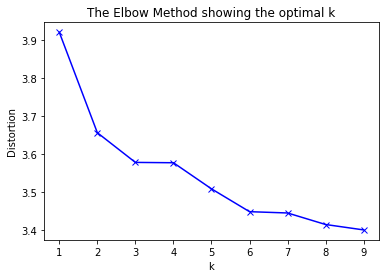

In [59]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X2)
    kmeanModel.fit(X2)
    distortions.append(sum(np.min(cdist(X2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X2.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
X2_norm = normalize(X2)

pca = PCA(n_components = None)
# Reduce it to two components.
X_pca = pca.fit_transform(X2_norm)

explained_variance = pca.explained_variance_ratio_

explained_variance[:5]

array([ 0.09156488,  0.02832635,  0.01823414,  0.01673297,  0.01400746])

In [61]:
# Calculate predicted values.
Y2_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X2)

In [62]:
bow_clusters_df = bow_df2.copy()

In [63]:
bow_clusters_df['clusters'] = Y2_pred

In [64]:
for i in range(bow_clusters_df['clusters'].nunique()):
    cluster = bow_clusters_df[bow_clusters_df['clusters']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['authors'])),'\n')

Cluster  0 
 Counter({'Hughes': 122, 'Angelou': 104, 'Neruda': 90, 'Frost': 87, 'Yeats': 69, 'Dickinson': 53, 'Rumi': 47, 'LiPo': 46, 'Shakespeare': 45, 'Blake': 43}) 

Cluster  1 
 Counter({'Yeats': 3, 'Angelou': 2}) 

Cluster  2 
 Counter({'Blake': 8, 'Frost': 4, 'Hughes': 1, 'Angelou': 1, 'Dickinson': 1}) 

Cluster  3 
 Counter({'Blake': 13, 'Yeats': 9, 'Frost': 7, 'Rumi': 6, 'Hughes': 4, 'Angelou': 4, 'Neruda': 4, 'Shakespeare': 2}) 



In [100]:
# This cluster is mostly sentences with i, he, she, we in them

bow_cluster0 = bow_clusters_df.loc[bow_clusters_df['clusters']== 0, ['processed_no_punct','authors']]
for i in bow_cluster0.index[:5]:
    print(bow_cluster0.loc[i,'processed_no_punct'], '\n')

i love you as you dress and how your hair lifts up and how your mouth smiles light as the water of the spring upon the pure stones like this 

”   

— pausing — at her low gate 

thats what hoppings all about  both feet flat the game is done 

you may write me down in history with your bitter twisted lies you may trod me in the very dirt but still like dust ill rise   



In [99]:
# This cluster is mostly sentences with i, he, she, we in them

bow_cluster1 = bow_clusters_df.loc[bow_clusters_df['clusters']== 1, ['processed_no_punct','authors']]
for i in bow_cluster1.index[:5]:
    print(bow_cluster1.loc[i,'processed_no_punct'], '\n')

a free bird leaps  on the back of the wind    and floats downstream    till the current ends  and dips his wing  in the orange sun rays  and dares to claim the sky   but a bird that stalks  down his narrow cage  can seldom see through  his bars of rage  his wings are clipped and    his feet are tied  so he opens his throat to sing   the caged bird sings    with a fearful trill    of things unknown    but longed for still    and his tune is heard    on the distant hill    for the caged bird    sings of freedom   the free bird thinks of another breeze  and the trade winds soft through the sighing trees  and the fat worms waiting on a dawn bright lawn  and he names the sky his own   but a caged bird stands on the grave of dreams    his shadow 

the eye follows the land  slips upward creases down forms    the gentle buttocks of a young    giant in the nestle  old adobe bricks washed of    whiteness paled to umber  await another century   star jasmine and old vines  lay claim upon the ghost

In [98]:
bow_cluster2 = bow_clusters_df.loc[bow_clusters_df['clusters']== 2, ['processed_no_punct','authors']]
for i in bow_cluster2.index[:5]:
    print(bow_cluster2.loc[i,'processed_no_punct'], '\n')

i myself desired  there were ten thousand thousand fruit to touch  cherish in hand lift down and not let fall  for all  that struck the earth  no matter if not bruised or spiked with stubble  went surely to the cider apple heap  as of no worth  one can see what will trouble  this sleep of mine whatever sleep it is  were 

the soul unto itself is an imperial friend  –   or the most agonizing spy  –   an enemy  –  could send  –   secure against its own  –   no treason it can fear  –   itself  –  its sovereign  –  of itself the soul should stand in awe  –   

never seek to tell thy love  love that never told can be  for the gentle wind does move  silently invisibly  i told my love i told my love  i told her all my heart  trembling cold in ghastly fears ah she doth depart  soon as she was gone from me  a traveller came by  silently invisibly   

magnified apples appear and disappear  stem end and blossom end  and every fleck of russet showing clear  my instep arch not only keeps the ache  

In [97]:
bow_cluster3 = bow_clusters_df.loc[bow_clusters_df['clusters']== 3, ['processed_no_punct','authors']]
for i in bow_cluster3.index[:5]:
    print(bow_cluster3.loc[i,'processed_no_punct'], '\n')

and then the wall rose  rose slowly  slowly  between me and my dream   

my long two pointed ladders sticking through a tree  toward heaven still  and theres a barrel that i didnt fill  beside it and there may be two or three  apples i didnt pick upon some bough   

he always kept his poise  to the top branches climbing carefully  with the same pains you use to fill a cup  up to the brim and even above the brim  then he flung outward feet first with a swish  kicking his way down through the air to the ground  so was i once myself a swinger of birches   

i met the bishop on the road  and much said he and i  those breasts are flat and fallen now  those veins must soon be dry  live in a heavenly mansion  not in some foul sty   fair and foul are near of kin  and fair needs foul 

a beautiful song it says come rest here by my side  each of you a bordered country delicate and strangely made proud yet thrusting perpetually under siege  your armed struggles for profit have left collars of was

In [69]:
bandwidth = estimate_bandwidth(X2, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X2)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 7


In [70]:
bow_mean_shift_clusters = bow_df2.copy()

In [71]:
bow_mean_shift_clusters['clusters'] = labels

In [72]:
for i in range(bow_mean_shift_clusters['clusters'].nunique()):
    cluster = bow_mean_shift_clusters[bow_mean_shift_clusters['clusters']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['authors'])),'\n')

Cluster  0 
 Counter({'Hughes': 119, 'Angelou': 104, 'Neruda': 93, 'Frost': 89, 'Yeats': 70, 'Dickinson': 53, 'Rumi': 50, 'Shakespeare': 45, 'LiPo': 44, 'Blake': 43}) 

Cluster  1 
 Counter({'LiPo': 2}) 

Cluster  2 
 Counter({'Yeats': 2, 'Rumi': 1}) 

Cluster  3 
 Counter({'Blake': 7, 'Angelou': 3, 'Frost': 2, 'Hughes': 1, 'Dickinson': 1}) 

Cluster  4 
 Counter({'Hughes': 1}) 

Cluster  5 
 Counter({'Hughes': 5}) 

Cluster  6 
 Counter({'Blake': 14, 'Yeats': 9, 'Frost': 7, 'Angelou': 4, 'Shakespeare': 2, 'Rumi': 2, 'Hughes': 1, 'Neruda': 1}) 



In [73]:
mean_shift_cluster1 = bow_mean_shift_clusters.loc[bow_mean_shift_clusters['clusters']== 1, ['processed_no_punct','authors']]
for i in mean_shift_cluster1.index:
    print(mean_shift_cluster1.loc[i,'processed_no_punct'], '\n')

i will travel with moon and shadow happy to the end of spring  when i sing the moon dances  when i dance my shadow dances too   

then i sigh for the moon cannot drink and my shadow goes emptily along with me never saying a word with no other friends here i can but use these two for company in the time of happiness i too must be happy with all around me i sit and sing and it is as if the moon accompanies me then if i dance it is my shadow that dances along with me while still not drunk i am glad to make the moon and my shadow into friends but then when i have drunk too much we all part yet these are friends i can always count on these who have no emotion whatsoever 



In [96]:
mean_shift_cluster2 = bow_mean_shift_clusters.loc[bow_mean_shift_clusters['clusters']== 2, ['processed_no_punct','authors']]
for i in mean_shift_cluster2.index[:5]:
    print(mean_shift_cluster2.loc[i,'processed_no_punct'], '\n')

is the sacrifice  like the birds of the sea men come from the ocean  the ocean of the soul  like the birds of the sea men come from the ocean  the ocean of the soul  how could this bird born from that sea make his dwelling here   

once more the storm is howling and half hid under this cradle hood and coverlid my child sleeps on  there is no obstacle but gregory’s wood and one bare hill whereby the haystack  and roof levelling wind bred on the atlantic can be stayed and for an hour i have walked and prayed because of the great gloom that is in my mind  i have walked and prayed for this young child an hour and heard the sea wind scream upon the tower and under the arches of the bridge and scream in the elms above the flooded stream imagining in excited reverie that the future years had come dancing to a frenzied drum out of the murderous innocence of the sea  may she be granted beauty and yet not beauty to make a stranger’s eye distraught or hers before a looking glass for such being ma

### DF_IDF

In [75]:
corpus = []
for i in range(poems_df.shape[0]):
    corpus.append(poems_df.loc[i,'no_punct_cap_poems'])

In [76]:
vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus)
idf = vectorizer.idf_

In [77]:
idf_dict = dict(zip(vectorizer.get_feature_names(), idf))

In [78]:
idf_words = list(idf_dict.keys())

In [79]:
def idf_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['processed_no_punct'] = sentences['processed_no_punct']
    df['authors'] = sentences['authors']
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['processed_no_punct']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += idf_dict[word]
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [80]:
dfidf_df = idf_features(poems_df, idf_words)

Processing row 0


In [81]:
dfidf_df.head()

tender beautiful stream choke length sudden thump  liberty sojourn  \
52       0         0      0     0      0      0     0        0       0   
133      0         0      0     0      0      0     0  5.25561       0   
17       0   3.55086      0     0      0      0     0        0       0   
48       0         0      0     0      0      0     0        0       0   
53       0         0      0     0      0      0     0        0       0   

    beating agonizing terrified absolute    apart surrounding  \
52        0         0         0        0        0           0   
133       0         0         0        0  4.56247           0   
17        0         0         0        0        0           0   
48        0         0         0        0        0           0   
53        0         0         0        0        0           0   

    phantasmatalities always didn daylight studded engaged attribute realm  \
52                  0      0    0        0       0       0         0     0   
133                 0      0    0        0       0       0         0     0   
17                  0      0    0        0       0       0         0     0   
48                  0      0    0        0       0       0         0     0   
53                  0      0    0        0       0       0         0     0   

    cautious arching      yes croon ends plate herewith root philosophy  \
52         0       0        0     0    0     0        0    0          0   
133        0       0  4.33932     0    0     0        0    0          0   
17         0       0        0     0    0     0        0    0          0   
48         0       0        0     0    0     0        0    0          0   
53         0       0        0     0    0     0        0    0          0   

        hurt stood grant balanced casement velvet before visible casts  \
52         0     0     0        0        0      0      0       0     0   
133        0     0     0        0        0      0      0       0     0   
17         0     0     0        0        0      0      0       0     0   
48   4.56247     0     0        0        0      0      0       0     0   
53         0     0     0        0        0      0      0       0     0   

    brother  breathe stock universe poured baseball between jealous hunted  \
52        0  4.85015     0        0      0        0       0       0      0   
133       0  4.85015     0        0      0        0       0       0      0   
17        0        0     0        0      0        0       0       0      0   
48        0        0     0        0      0        0       0       0      0   
53        0        0     0        0      0        0       0       0      0   

    bless folly cocks appalls anew    sweat figured whom disaster gurgle  \
52      0     0     0       0    0        0       0    0        0      0   
133     0     0     0       0    0  4.85015       0    0        0      0   
17      0     0     0       0    0        0       0    0        0      0   
48      0     0     0       0    0        0       0    0        0      0   
53      0     0     0       0    0        0       0    0        0      0   

    chattering wherever there fiery shrill beginnings    shake done     fair  \
52           0        0     0     0      0          0  4.85015    0  10.9385   
133          0        0     0     0      0          0        0    0        0   
17           0        0     0     0      0          0        0    0  3.64617   
48           0        0     0     0      0          0        0    0        0   
53           0        0     0     0      0          0        0    0        0   

    state     bell mathematics verily hood     live heat invent hymns glade  \
52      0        0           0      0    0        0    0      0     0     0   
133     0        0           0      0    0  3.24071    0      0     0     0   
17      0        0           0      0    0        0    0      0     0     0   
48      0        0           0      0    0        0    0      0     0     0   
5

In [82]:
Y3 = dfidf_df['authors']
X3 = np.array(dfidf_df.drop(['processed_no_punct','authors'], 1))

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.20, random_state=42)

In [83]:
rfc3 = ensemble.RandomForestClassifier()

rfc3.fit(X3_train, Y3_train)

print('Training set score:', rfc3.score(X3_train, Y3_train))
print('Test set score:', rfc3.score(X3_test, Y3_test))

Training set score: 1.0
Test set score: 0.178571428571


In [84]:
lr3 = LogisticRegression()
lr3.fit(X3_train, Y3_train)

print('Training set score:', lr3.score(X3_train, Y3_train))
print('Training set score:', lr3.score(X3_test, Y3_test))

Training set score: 1.0
Training set score: 0.0357142857143


In [85]:
clf3 = ensemble.GradientBoostingClassifier()
clf3.fit(X3_train, Y3_train)

print('Training set score:', clf3.score(X3_train, Y3_train))
print('Training set score:', clf3.score(X3_test, Y3_test))

Training set score: 1.0
Training set score: 0.0357142857143


In [86]:
svm3 = SVC(kernel = 'linear')
svm3.fit(X3_train, Y3_train)

print('Training set score:', svm3.score(X3_train, Y3_train))
print('Training set score:', svm3.score(X3_test, Y3_test))

Training set score: 1.0
Training set score: 0.0714285714286


### DF-IDF by sentences

In [87]:
dfidf_df2 = idf_features(sentences_df, idf_words)

Processing row 0
Processing row 500


In [88]:
dfidf_df2.head()

tender beautiful stream choke length sudden thump liberty sojourn beating  \
0      0         0      0     0      0      0     0       0       0       0   
1      0         0      0     0      0      0     0       0       0       0   
2      0         0      0     0      0      0     0       0       0       0   
3      0         0      0     0      0      0     0       0       0       0   
4      0         0      0     0      0      0     0       0       0       0   

  agonizing terrified absolute apart surrounding phantasmatalities always  \
0         0         0        0     0           0                 0      0   
1         0         0        0     0           0                 0      0   
2         0         0        0     0           0                 0      0   
3         0         0        0     0           0                 0      0   
4         0         0        0     0           0                 0      0   

  didn daylight studded engaged attribute realm cautious arching yes croon  \
0    0        0       0       0         0     0        0       0   0     0   
1    0        0       0       0         0     0        0       0   0     0   
2    0        0       0       0         0     0        0       0   0     0   
3    0        0       0       0         0     0        0       0   0     0   
4    0        0       0       0         0     0        0       0   0     0   

  ends plate herewith root philosophy hurt stood grant balanced casement  \
0    0     0        0    0          0    0     0     0        0        0   
1    0     0        0    0          0    0     0     0        0        0   
2    0     0        0    0          0    0     0     0        0        0   
3    0     0        0    0          0    0     0     0        0        0   
4    0     0        0    0          0    0     0     0        0        0   

  velvet before visible casts brother breathe stock universe poured baseball  \
0      0      0       0     0       0       0     0        0      0        0   
1      0      0       0     0       0       0     0        0      0        0   
2      0      0       0     0       0       0     0        0      0        0   
3      0      0       0     0       0       0     0        0      0        0   
4      0      0       0     0       0       0     0        0      0        0   

  between jealous hunted bless folly cocks appalls anew sweat figured whom  \
0       0       0      0     0     0     0       0    0     0       0    0   
1       0       0      0     0     0     0       0    0     0       0    0   
2       0       0      0     0     0     0       0    0     0       0    0   
3       0       0      0     0     0     0       0    0     0       0    0   
4       0       0      0     0     0     0       0    0     0       0    0   

  disaster gurgle chattering wherever there fiery shrill beginnings shake  \
0        0      0          0        0     0     0      0          0     0   
1        0      0          0        0     0     0      0          0     0   
2        0      0          0        0     0     0      0          0     0   
3        0      0          0        0     0     0      0          0     0   
4        0      0          0        0     0     0      0          0     0   

  done fair state bell mathematics verily hood live heat invent hymns glade  \
0    0    0     0    0           0      0    0    0    0      0     0     0   
1    0    0     0    0           0      0    0    0    0      0     0     0   
2    0    0     0    0           0      0    0    0    0      0     0     0   
3    0    0     0    0           0      0    0    0    0      0     0     0   
4    0    0     0    0           0      0    0    0    0      0     0     0   

  notice fix greek expect cornice prowl face thats affright poland articulate  \
0      0   0     0      0       0     0    0     0        0      0          0   
1      0   0     0      0       0     0    0     0        0      0          0   
2      

In [144]:
X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

(775, 3991)

In [149]:
X4

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [146]:
X4_train.shape

(620, 3991)

In [147]:
dfidf_df2.shape

(775, 3993)

In [89]:
Y4 = dfidf_df2['authors']
X4 = np.array(dfidf_df2.drop(['processed_no_punct','authors'], 1))

X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.20, random_state=42)

In [90]:
rfc4 = ensemble.RandomForestClassifier()

rfc4.fit(X4_train, Y4_train)

print('Training set score:', rfc4.score(X4_train, Y4_train))
print('Test set score:', rfc4.score(X4_test, Y4_test))

Training set score: 0.948387096774
Test set score: 0.361290322581


In [91]:
lr4 = LogisticRegression()
lr4.fit(X4_train, Y4_train)

print('Training set score:', lr4.score(X4_train, Y4_train))
print('Training set score:', lr4.score(X4_test, Y4_test))

Training set score: 0.954838709677
Training set score: 0.393548387097


In [92]:
clf4 = ensemble.GradientBoostingClassifier()
clf4.fit(X4_train, Y4_train)

print('Training set score:', clf4.score(X4_train, Y4_train))
print('Training set score:', clf4.score(X4_test, Y4_test))

Training set score: 0.909677419355
Training set score: 0.309677419355


In [93]:
svm4 = SVC(kernel = 'linear')
svm4.fit(X4_train, Y4_train)

print('Training set score:', svm4.score(X4_train, Y4_train))
print('Training set score:', svm3.score(X4_test, Y4_test))

Training set score: 0.954838709677
Training set score: 0.0709677419355


In [166]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

X_index, Y_index = train_test_split(sentences_df, test_size=0.2, random_state=0)

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X4_train_lsa = lsa.fit_transform(X4_train)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X4_train_lsa,index=X_index)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 70.1166574714
Component 0:
((half, girl,    , to, marry), Hughes)                                                                                                                                                                        0.553621
((oh, god, who, gives, the, grace, of, vision, the, bird, of, vision, is, flying, towards, you, with, the, wings, of, desire), Rumi)                                                                          0.350010
((he, bade, his, heart, go, to, her,  ), Yeats)                                                                                                                                                               0.334446
((and, once, she, went, to, break, a, bough, of, black, alder, she, strayed), Frost)                                                                                                                          0.331382
((—,  ), Dickinson)                                                 

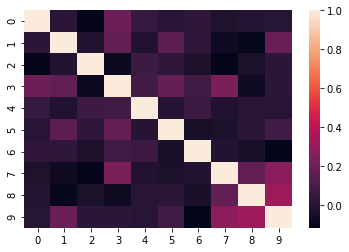

Key:
0 (’s all a glimmer and noon a purple glow and evening full of the linnet’s wings  , 'Yeats')
1 (o blues swaying to and fro on his rickety stool he played that sad raggy tune like a musical fool      sweet blues coming from a black man’s soul      o blues in a deep song voice with a melancholy tone, 'Hughes')
2 (ah sun flower weary of time  who countest the steps of the sun  seeking after that sweet golden clime  where the travellers journey is done   where the youth pined away with desire  and the pale virgin shrouded in snow  arise from their graves and aspire  where my sun flower wishes to go, 'Blake')
3 (and so i dream of going back to be  , 'Frost')
4 (i’ll tell thee he is called by thy name for he calls himself a lamb he is meek  , 'Blake')
5 (he learned all there was  to learn about not launching out too soon  and so not carrying the tree away  clear to the ground, 'Frost')
6 (i have lost my senses in my world of lovers, 'Rumi')
7 (she notes the chariots, 'Dickinson')
8 (i’

In [168]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X4_train_lsa) * np.asmatrix(X4_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_index).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])


### Cluster analysis df-idf

In [94]:
bandwidth = estimate_bandwidth(X4, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X4)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 10


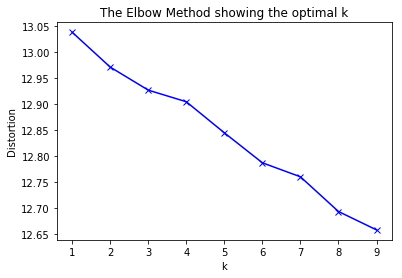

In [95]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X4)
    kmeanModel.fit(X4)
    distortions.append(sum(np.min(cdist(X4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X4.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()